In [1]:
import networkx as nx
from max_clique import find_max_clique as fmc

In [2]:
def find_max_clique(comp_g):
    set_connected_g = [comp_g.subgraph(comp).copy() for comp in nx.connected_components(comp_g)]
    max_clique = []
    max_clique_weight = 0
    for g in set_connected_g:
        edges = sorted(g.edges(data=True), key=lambda edge: edge[2].get('weight', 1), reverse=True)
        set_modules_edges = {(edge[0][0], edge[1][0]) for edge in edges}
        selected_modules = []
        selected_layouts = []
        selected_edges = []

        for edge in edges:
            first_module = edge[0][0]
            first_layout = edge[0]
            second_module = edge[1][0]
            second_layout = edge[1]

            if(len(selected_edges) == 0):
                selected_edges.append(edge)
                selected_modules.append(first_module)
                selected_modules.append(second_module)
                selected_layouts.append(first_layout)
                selected_layouts.append(second_layout)
            elif((first_module in selected_modules) and (second_module in selected_modules)):
                print('prova')
                continue
            elif((first_module not in selected_modules) and (second_module not in selected_modules)):
                print('prova')
                is_connected = True
                for mod in selected_modules:
                    #CONTROLLA ANCHE IL CONTRARIO
                    if(((first_module, mod) not in set_modules_edges and (mod, first_module) not in set_modules_edges) or ((second_module, mod) not in set_modules_edges and (mod, second_module) not in set_modules_edges)):
                        is_connected = False
                        break
                
                if(is_connected):
                    selected_edges.append(edge)
                    selected_modules.append(first_module)
                    selected_modules.append(second_module)
                    selected_layouts.append(first_layout)
                    selected_layouts.append(second_layout)

            elif((first_module not in selected_modules) and (second_module in selected_modules)):
                is_connected = True
                for mod in selected_modules:
                    #CONTROLLA ANCHE IL CONTRARIO
                    if((first_module, mod) not in set_modules_edges and (mod, first_module) not in set_modules_edges):
                        is_connected = False
                        break
            
                if(is_connected):
                    selected_edges.append(edge)
                    selected_modules.append(first_module)
                    selected_modules.append(second_module)
                    selected_layouts.append(first_layout)
                    selected_layouts.append(second_layout)

            elif((second_module not in selected_modules) and (first_module in selected_modules)):
                is_connected = True
                for mod in selected_modules:
                    #CONTROLLA ANCHE IL CONTRARIO
                    if((second_module, mod) not in set_modules_edges and (mod, second_module) not in set_modules_edges):
                        is_connected = False
                        break
            
                if(is_connected):
                    selected_edges.append(edge)
                    selected_modules.append(first_module)
                    selected_modules.append(second_module)
                    selected_layouts.append(first_layout)
                    selected_layouts.append(second_layout)

        clique = nx.from_edgelist(selected_edges)
        weights = sum(edge[2].get('weight', 1) for edge in selected_edges)

        if(weights > max_clique_weight):
            max_clique_weight = weights
            max_clique = clique
            print(selected_edges)

    return max_clique, max_clique_weight





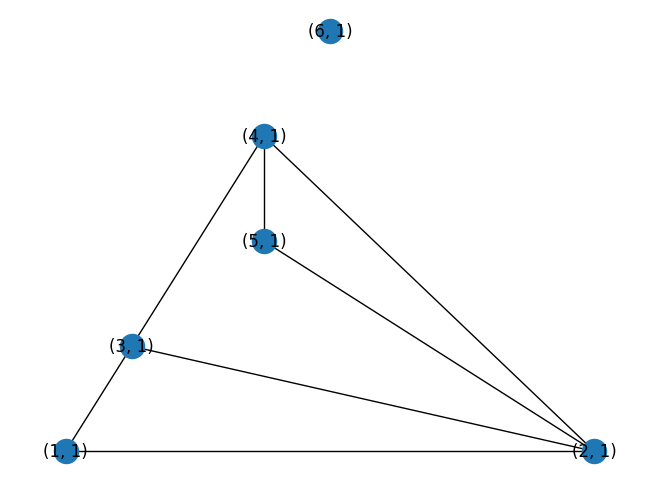

In [12]:
g = nx.Graph()
for i in range(6):
    g.add_node((i + 1, 1))
#First connected component
g.add_edge((1,1), (2,1), weight = 0)
g.add_edge((2,1), (3,1), weight = 10)
g.add_edge((1,1), (3,1), weight = 0)

#Second connected component
g.add_edge((4,1), (5,1), weight = 0)
g.add_edge((3,1), (4,1), weight = 0)
#g.add_edge((5,1), (6,1), weight = 5.6)
#g.add_edge((4,1), (6,1), weight = 4.6)

g.add_edge((2,1), (4,1), weight = 100)
g.add_edge((2,1), (5,1), weight = 0)


nx.draw_planar(g, with_labels=True)


Clique con somma dei pesi massima: [(2, 1), (3, 1), (4, 1)]
Somma dei pesi: 110
[((2, 1), (3, 1)), ((2, 1), (4, 1)), ((3, 1), (4, 1))]


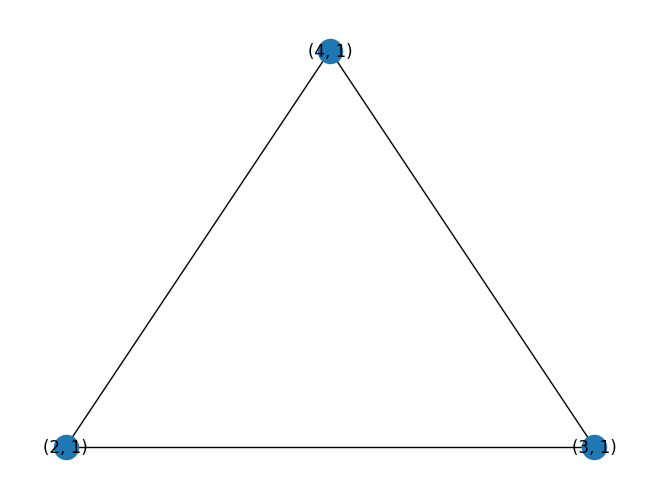

In [11]:

max_clique, max_weight = fmc(g)
print("Clique con somma dei pesi massima:", max_clique)
print("Somma dei pesi:", max_weight)
nx.draw_planar(g.subgraph(max_clique), with_labels = True)